#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Creating DataFrames from csv files

In [ ]:
#loading file into dataframe
filepath="../content/keys2.txt"
df=pd.read_csv(filepath, delimiter="|",names=['date_time','key'])

#Checking the DataFrame

In [ ]:
#discovering dataframe
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date_time  11 non-null     object
 1   key        11 non-null     object
dtypes: object(2)
memory usage: 304.0+ bytes


,date_time,key
0,"2022-06-14 12:42:53,459",Key.space
1,"2022-06-14 12:42:53,922",'t'
2,"2022-06-14 12:42:54,301",'e'
3,"2022-06-14 12:42:54,607",'s'
4,"2022-06-14 12:42:54,752",'t'


#DataFrame modifications and cleaning

In [ ]:
#Format timestamp indo pd type(datetime):
df['date_time']=pd.to_datetime(df['date_time'])
df.head()

,date_time,key
0,2022-06-14 12:42:53.459,Key.space
1,2022-06-14 12:42:53.922,'t'
2,2022-06-14 12:42:54.301,'e'
3,2022-06-14 12:42:54.607,'s'
4,2022-06-14 12:42:54.752,'t'


In [ ]:
#Cleaning data presentation:

print(df.key) #dataframe before changes


def cleaning(chars):
    #function to clean the data from a column

    if "Key." in chars:
        lst_chars=chars.split('.')

    elif "'" in chars:
        lst_chars=chars.split("'")

    chars=lst_chars[1]
        
    return(chars)

0      Key.space
1            't'
2            'e'
3            's'
4            't'
5      Key.space
6            'k'
7            'e'
8            'y'
9      Key.shift
10           '2'
Name: key, dtype: object


In [ ]:
#Using the cleaning fonction to clean each chars
df['clean_key'] = df["key"].apply(lambda x: cleaning(x))

In [ ]:
#printing the updated dataframe
df

,date_time,key,clean_key
0,2022-06-14 12:42:53.459,Key.space,space
1,2022-06-14 12:42:53.922,'t',t
2,2022-06-14 12:42:54.301,'e',e
3,2022-06-14 12:42:54.607,'s',s
4,2022-06-14 12:42:54.752,'t',t
5,2022-06-14 12:42:55.445,Key.space,space
6,2022-06-14 12:42:56.042,'k',k
7,2022-06-14 12:42:56.232,'e',e
8,2022-06-14 12:42:56.526,'y',y
9,2022-06-14 12:42:57.526,Key.shift,shift


# find value_counts for each "Key" in a new dataframe

# example 'space' key columns = ["unique_key", "instance_count"]
# 1, space, 2

In [ ]:
#adding a typed times column
df['typed_times']=1
print(df.head())

                date_time         key clean_key  typed_times
0 2022-06-14 12:42:53.459   Key.space     space            1
1 2022-06-14 12:42:53.922         't'         t            1
2 2022-06-14 12:42:54.301         'e'         e            1
3 2022-06-14 12:42:54.607         's'         s            1
4 2022-06-14 12:42:54.752         't'         t            1


In [ ]:
data=df.groupby('clean_key')['typed_times'].sum()
# data=df.clean_key.value_counts(sort=True)
data

clean_key
2        1
e        2
k        1
s        1
shift    1
space    2
t        2
y        1
Name: typed_times, dtype: int64

In [ ]:
#Creating the new DataFrame and naming columns
new_df=pd.DataFrame(data).reset_index()
new_df.typed_times

0    1
1    2
2    1
3    1
4    1
5    2
6    2
7    1
Name: typed_times, dtype: int64

In [ ]:
new_df.head()

,clean_key,typed_times
0,2,1
1,e,2
2,k,1
3,s,1
4,shift,1


# utilize plotly to graph the keys you typed in the raspberry pi
# Bar Chart

Text(0.5, 1.0, 'Most Typed Keys')

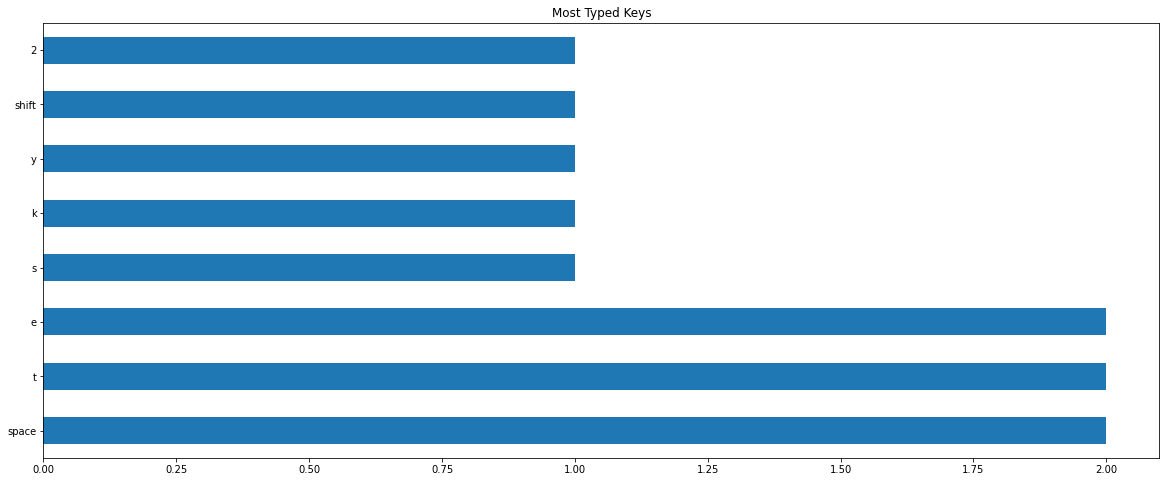

In [ ]:
#Creating the bar chart histogram with keys typed
new_plot = (df['clean_key'].value_counts(sort=True))

new_plot.head(20).plot(kind='barh',stacked=False,figsize=(20,8))
plt.title("Most Typed Keys")

# Display the results on a pic with most used keys bigger (Wordcloud)

In [ ]:
#Import Libraries
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# step 1 - concatenate all key values as strings into an array:

keytxt = " ".join(clean_key for clean_key in df.clean_key.astype(str))
print(keytxt)

space t e s t space k e y shift 2


In [ ]:
# step 2 - initialize wordcloud and generate image using the text variable and use imshow to display the results:

# create a word frequency dictionary
keyfreq = {}
for key,nb in zip(new_df.clean_key,new_df.typed_times):
  keyfreq.update({key:nb})
print(keyfreq)

{'2': 1, 'e': 2, 'k': 1, 's': 1, 'shift': 1, 'space': 2, 't': 2, 'y': 1}


Text(0.5, 1.0, 'Most Typed Keys')

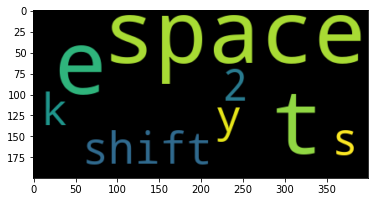

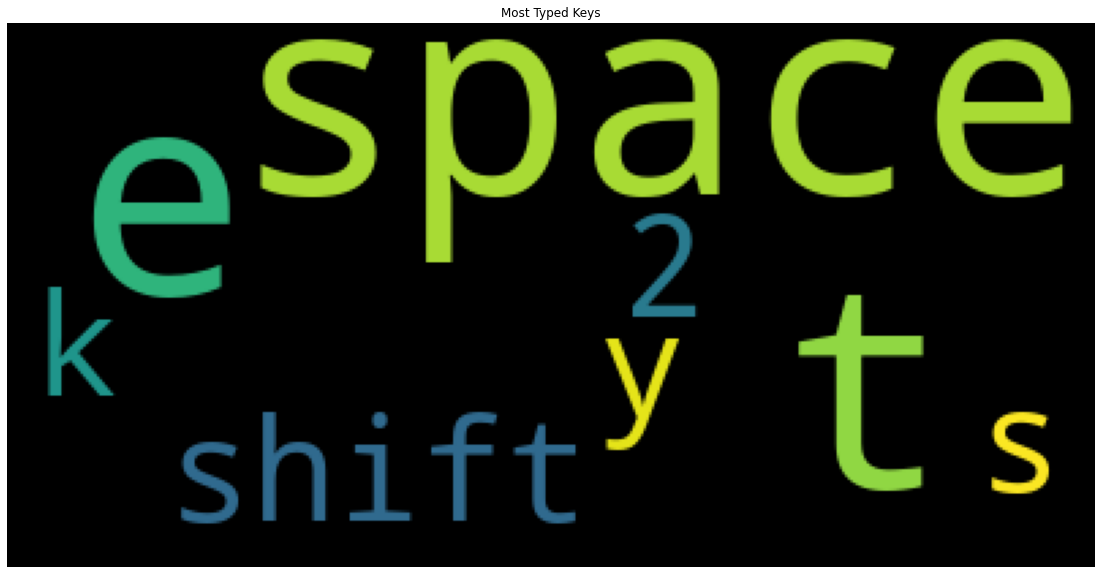

In [ ]:
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(relative_scaling=1).generate_from_frequencies(keyfreq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Typed Keys")

#Tests

In [ ]:
# df['typed_times']=1
# print(df.head())

In [ ]:
# instance_counts=df.clean_key.value_counts(sort=True)
# data=instance_counts
# print(instance_counts)

space    2
t        2
e        2
s        1
k        1
y        1
shift    1
2        1
Name: clean_key, dtype: int64


In [ ]:
# new_df=pd.DataFrame(data2)
# new_df.head(8)

clean_key
2        1
e        2
k        1
s        1
shift    1
space    2
t        2
y        1
Name: typed_times, dtype: int64